In [1]:
import numpy as  np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import sys
from astropy import units as un
from scipy import constants as cs
from scipy import interpolate
from scipy import optimize as opt

sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from GC_Orbit_class import GCorbit

import galpy.potential as galpot
from galpy.orbit import Orbit
from galpy.util import bovy_coords
from galpy.actionAngle import actionAngleIsochrone

%matplotlib inline

In [2]:
#data: need actions J_r, J_phi, J_theta
if 0:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [3]:
mges=np.sum(m1+m2)
G=(un.m**3/(un.kg*un.s**2)).to(un.pc**3/(un.solMass*un.s**2), cs.G) #m3 / (kg s2) to pc³/(Msun*s²)
r=np.exp(np.linspace(np.log(np.min(r_3d[1:])),np.log(200),500))
b=1.
b2=b**2.
z0=0
r2= r**2.+z0**2.
rb= np.sqrt(r2+b2)
rho=mges*((3.*(b+rb)*rb**2.-r2*(b+3.*rb))/rb**3./(b+rb)**3./4./np.pi) #Einheit Msun/pc**3

test=GCorbit(r_pc=r,rho_M_sunpc3=rho) #bhmass_M_sun=np.sum(m1[0]+m2[0])

pot_iso=-G*mges/(b+np.sqrt(b**2.+r**2))
print(rho[0],rho[-1])

18413.899994 3.0460188934e-05


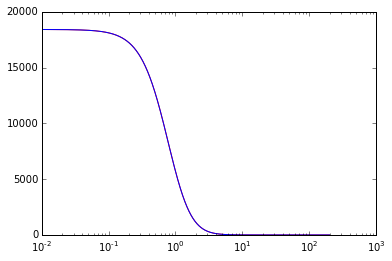

In [4]:
#test if GCorbit.density is right
r_temp=np.exp(np.linspace(np.log(0.01),np.log(200),1000))
r2_temp=r_temp**2
rb_temp= np.sqrt(r2_temp+b2)
rho_temp=mges*((3.*(b+rb_temp)*rb_temp**2.-r2_temp*(b+3.*rb_temp))/rb_temp**3./(b+rb_temp)**3./4./np.pi)
plt.semilogx(r_temp,test.density(r_temp),'r-',r_temp,rho_temp,'b-')
#anzahl der werte bestimmen zu ner guten übereinstimmung

(1, 200)

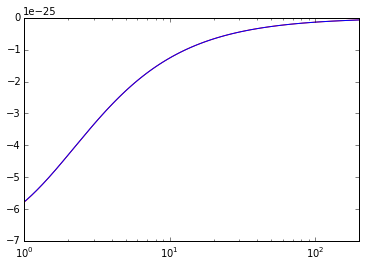

In [5]:
#test if GCorbit._potential_stars is right
pot_iso=-G*mges/(b+np.sqrt(b**2.+r_temp**2))
plt.semilogx(r_temp,test.potential(r=r_temp),'r-',r_temp,pot_iso,'b-')
plt.xlim(1,200)

     jac: array([ 9324.98107886])
     nit: 2
 success: False
    nfev: 50
 message: 'Linear search failed'
       x: array([ 0.02930258])
  status: 4
     fun: array([ 0.00035486])
     jac: array([-1348.09532507])
     nit: 2
 success: True
    nfev: 26
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
       x: array([ 1.22626223])
  status: 2
     fun: array([  2.22423828e-05])
0.1143996892
     jac: array([ 9324.98107886])
     nit: 2
 success: False
    nfev: 50
 message: 'Linear search failed'
       x: array([ 0.02930258])
  status: 4
     fun: array([ 0.00035486])
     jac: array([-1348.09532507])
     nit: 2
 success: True
    nfev: 26
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
       x: array([ 1.22626223])
  status: 2
     fun: array([  2.22423828e-05])
0.1143996892


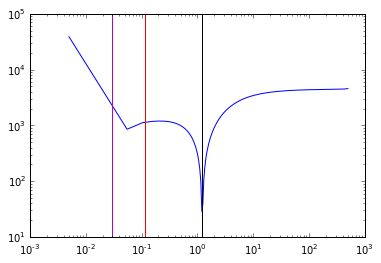

In [6]:
n=785
L=test.angularmom(x[n],y[n],z[n],vx[n],vy[n],vz[n])[0]
E=test.energy(x[n],y[n],z[n],vx[n],vy[n],vz[n])
r=np.linspace(0.005,500,10000)
plt.loglog(r,test._periapocenter_aux(r=r,E=E,L=L))
plt.axvline(r_3d[n],color='r')
plt.axvline(test.periapocenter(x[n],y[n],z[n],vx[n],vy[n],vz[n])[0], color='m')
plt.axvline(test.periapocenter(x[n],y[n],z[n],vx[n],vy[n],vz[n])[1], color='black')



[ 0.669642] 0.669642 [ 0.67205271]
     jac: array([ 0.40927328])
     nit: 3
 success: False
    nfev: 53
 message: 'Linear search failed'
       x: array([ 0.61821144])
  status: 4
     fun: array([  3.57805030e-09])
     jac: array([ 1.00670059])
     nit: 2
 success: True
    nfev: 31
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
       x: array([ 0.67205271])
  status: 2
     fun: array([  1.39444012e-13])
0.669642567354
     jac: array([ 0.40927328])
     nit: 3
 success: False
    nfev: 53
 message: 'Linear search failed'
       x: array([ 0.61821144])
  status: 4
     fun: array([  3.57805030e-09])
     jac: array([ 1.00670059])
     nit: 2
 success: True
    nfev: 31
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
       x: array([ 0.67205271])
  status: 2
     fun: array([  1.39444012e-13])
0.669642567354


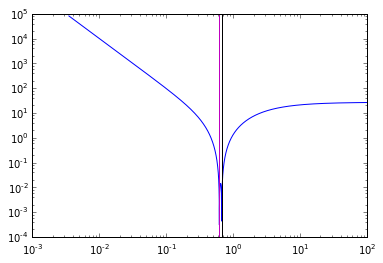

In [7]:
n=17916
L=test.angularmom(x[n],y[n],z[n],vx[n],vy[n],vz[n])[0]
E=test.energy(x[n],y[n],z[n],vx[n],vy[n],vz[n])
r=np.linspace(0.0035,100,100000)
plt.loglog(r,test._periapocenter_aux(r=r,E=E,L=L))
plt.axvline(r_3d[n],color='r')

rminn=opt.minimize(test._periapocenter_aux, x0=r_3d[n],args=(E,L),bounds=((np.min(r),r_3d[n]),))
rmaxx=opt.minimize(test._periapocenter_aux, x0=10*r_3d[n],args=(E,L),bounds=((r_3d[n],np.max(r)),))

print(rminn.x,r_3d[n],rmaxx.x)

plt.axvline(test.periapocenter(x[n],y[n],z[n],vx[n],vy[n],vz[n])[0], color='m')
plt.axvline(test.periapocenter(x[n],y[n],z[n],vx[n],vy[n],vz[n])[1], color='black')



     jac: array([ 0.05149454])
     nit: 3
 success: True
    nfev: 51
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
       x: array([ 2.66868103])
  status: 1
     fun: array([  2.77555756e-17])
     jac: array([ 0.00663592])
     nit: 2
 success: True
    nfev: 31
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
       x: array([ 7.64991438])
  status: 1
     fun: array([  5.86336535e-16])
7.29038494723
     jac: array([ 0.05149454])
     nit: 3
 success: True
    nfev: 51
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
       x: array([ 2.66868103])
  status: 1
     fun: array([  2.77555756e-17])
     jac: array([ 0.00663592])
     nit: 2
 success: True
    nfev: 31
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
       x: array([ 7.64991438])
  status: 1
     fun: array([  5.86336535e-16])
7.29038494723


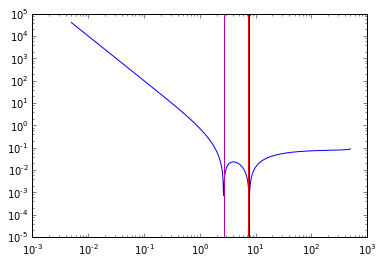

In [8]:
n=654919
L=test.angularmom(x[n],y[n],z[n],vx[n],vy[n],vz[n])[0]
E=test.energy(x[n],y[n],z[n],vx[n],vy[n],vz[n])
r=np.linspace(0.005,500,10000)
plt.loglog(r,test._periapocenter_aux(r=r,E=E,L=L))
plt.axvline(r_3d[n],color='r')

plt.axvline(test.periapocenter(x[n],y[n],z[n],vx[n],vy[n],vz[n])[0], color='m')
plt.axvline(test.periapocenter(x[n],y[n],z[n],vx[n],vy[n],vz[n])[1], color='black')

In [9]:
#test if GCorbit.orbit_integration is right
#n=178690
#xo,yo,zo,vxo,vyo,vzo,to=test.orbit_integration(x[n],y[n],z[n],vx[n],vy[n],vz[n],dt=10,t_end=100000)


##### galpy orbit #####
#in Galactocentric cylindrical coordinates vxvv=[R,vR,vT(,z,vz,phi)]

#xim=un.pc.to(un.m,x[n])
#yim=un.pc.to(un.m,y[n])
#zim=un.pc.to(un.m,z[n])
#vxim=(un.km/un.s).to(un.m/un.s,vx[n])
#vyim=(un.km/un.s).to(un.m/un.s,vy[n])
#vzim=(un.km/un.s).to(un.m/un.s,vz[n])
#R,phi,z_new=bovy_coords.rect_to_cyl(xim,yim,zim) #ort
#vR,vT,vz_new=bovy_coords.rect_to_cyl_vec(vxim,vyim,vzim,xim,yim,zim) #geschw
#o=Orbit(vxvv=[R,vR,vT,z_new,vz_new,phi])
#o.integrate(to,pot_iso)

In [10]:
#plt.plot(xo,yo)

In [11]:
#test if GCorbit.actions is right

In [12]:
n=785
m=17916
l=654919
J_phi_n,J_theta_n,J_r_n=test.actions(x[n],y[n],z[n],vx[n],vy[n],vz[n])
J_phi_m,J_theta_m,J_r_m=test.actions(x[m],y[m],z[m],vx[m],vy[m],vz[m])
J_phi_l,J_theta_l,J_r_l=test.actions(x[l],y[l],z[l],vx[l],vy[l],vz[l])

vx_pcs=(un.km/un.s).to(un.pc/un.s,vx)
vy_pcs=(un.km/un.s).to(un.pc/un.s,vy)
vz_pcs=(un.km/un.s).to(un.pc/un.s,vz)

Lx_n=y[n]*vz_pcs[n]-z[n]*vy_pcs[n]
Ly_n=z[n]*vx_pcs[n]-x[n]*vz_pcs[n]
Lz_n=x[n]*vy_pcs[n]-y[n]*vx_pcs[n]
L_n=np.sqrt(Lx_n**2+Ly_n**2+Lz_n**2)

Lx_m=y[m]*vz_pcs[m]-z[m]*vy_pcs[m]
Ly_m=z[m]*vx_pcs[m]-x[m]*vz_pcs[m]
Lz_m=x[m]*vy_pcs[m]-y[m]*vx_pcs[m]
L_m=np.sqrt(Lx_m**2+Ly_m**2+Lz_m**2)

Lx_l=y[l]*vz_pcs[l]-z[l]*vy_pcs[l]
Ly_l=z[l]*vx_pcs[l]-x[l]*vz_pcs[l]
Lz_l=x[l]*vy_pcs[l]-y[l]*vx_pcs[l]
L_l=np.sqrt(Lx_l**2+Ly_l**2+Lz_l**2)

pot_n=-G*mges/(b+np.sqrt(b**2.+np.sqrt(x[n]**2+y[n]**2+z[n]**2)**2))
E_n=vx_pcs[n]**2./2.+vy_pcs[n]**2./2.+vz_pcs[n]**2./2.+pot_n

J_phi_test_n=Lz_n
J_theta_test_n=L_n-np.abs(Lz_n)
J_r_test_n=G*mges/np.sqrt(-2.*E_n)-1./2.*(L_n+np.sqrt(L_n**2.+4.*G*mges*b))

pot_m=-G*mges/(b+np.sqrt(b**2.+np.sqrt(x[m]**2+y[m]**2+z[m]**2)**2))
E_m=vx_pcs[m]**2./2.+vy_pcs[m]**2./2.+vz_pcs[m]**2./2.+pot_n

J_phi_test_m=Lz_m
J_theta_test_m=L_m-np.abs(Lz_m)
J_r_test_m=G*mges/np.sqrt(-2.*E_m)-1./2.*(L_m+np.sqrt(L_m**2.+4.*G*mges*b))

pot_l=-G*mges/(b+np.sqrt(b**2.+np.sqrt(x[l]**2+y[l]**2+z[l]**2)**2))
E_l=vx_pcs[l]**2./2.+vy_pcs[l]**2./2.+vz_pcs[l]**2./2.+pot_l

J_phi_test_l=Lz_l
J_theta_test_l=L_l-np.abs(Lz_l)
J_r_test_l=G*mges/np.sqrt(-2.*E_l)-1./2.*(L_l+np.sqrt(L_l**2.+4.*G*mges*b))

J_phi_test_n_pckms=(un.pc**2/un.s).to(un.pc*un.km/un.s,J_phi_test_n)
J_theta_test_n_pckms=(un.pc**2/un.s).to(un.pc*un.km/un.s,J_theta_test_n)
J_r_test_n_pckms=(un.pc**2/un.s).to(un.pc*un.km/un.s,J_r_test_n)

J_phi_test_m_pckms=(un.pc**2/un.s).to(un.pc*un.km/un.s,J_phi_test_m)
J_theta_test_m_pckms=(un.pc**2/un.s).to(un.pc*un.km/un.s,J_theta_test_m)
J_r_test_m_pckms=(un.pc**2/un.s).to(un.pc*un.km/un.s,J_r_test_m)

J_phi_test_l_pckms=(un.pc**2/un.s).to(un.pc*un.km/un.s,J_phi_test_l)
J_theta_test_l_pckms=(un.pc**2/un.s).to(un.pc*un.km/un.s,J_theta_test_l)
J_r_test_l_pckms=(un.pc**2/un.s).to(un.pc*un.km/un.s,J_r_test_l)

     jac: array([ 9324.98107886])
     nit: 2
 success: False
    nfev: 50
 message: 'Linear search failed'
       x: array([ 0.02930258])
  status: 4
     fun: array([ 0.00035486])
     jac: array([-1348.09532507])
     nit: 2
 success: True
    nfev: 26
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
       x: array([ 1.22626223])
  status: 2
     fun: array([  2.22423828e-05])
0.1143996892
     jac: array([ 0.40927328])
     nit: 3
 success: False
    nfev: 53
 message: 'Linear search failed'
       x: array([ 0.61821144])
  status: 4
     fun: array([  3.57805030e-09])
     jac: array([ 1.00670059])
     nit: 2
 success: True
    nfev: 31
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
       x: array([ 0.67205271])
  status: 2
     fun: array([  1.39444012e-13])
0.669642567354
     jac: array([ 0.05149454])
     nit: 3
 success: True
    nfev: 51
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
       x: array([ 2.66868103])
  status: 1
     fun: array([  2.77555756e-17])
     jac: array([ 0.0066

In [13]:
r_3d[n]


0.1144

In [14]:
%tb

No traceback available to show.


In [15]:
print('#'+str(n)+'\t\tclass\t\t\tanalyticalfunc\nJ_phi\t\t'
      +str(J_phi_n)+'\t'+str(J_phi_test_n_pckms)
      +'\nJ_theta\t\t'+str(J_theta_n)+'\t'
      +str(J_theta_test_n_pckms)
      +'\nJ_r\t\t'+str(J_r_n)+'\t'+str(J_r_test_n_pckms))

#785		class			analyticalfunc
J_phi		0.280971272176	0.280971272176
J_theta		0.199198158959	0.199198158959
J_r		4.719892030386809	4.41597399177


In [16]:
print('#'+str(m)+'\t\tclass\t\t\tanalyticalfunc\nJ_phi\t\t'
      +str(J_phi_m)+'\t'+str(J_phi_test_m_pckms)
      +'\nJ_theta\t\t'+str(J_theta_m)+'\t'
      +str(J_theta_test_m_pckms)
      +'\nJ_r\t\t'+str(J_r_m)+'\t'+str(J_r_test_m_pckms))

#17916		class			analyticalfunc
J_phi		3.3910142878	3.3910142878
J_theta		3.03980497032	3.03980497032
J_r		0.010356516342271362	-1.95369833592


In [17]:
print('#'+str(l)+'\t\tclass\t\t\tanalyticalfunc\nJ_phi\t\t'
      +str(J_phi_l)+'\t'+str(J_phi_test_l_pckms)
      +'\nJ_theta\t\t'+str(J_theta_l)+'\t'
      +str(J_theta_test_l_pckms)
      +'\nJ_r\t\t'+str(J_r_l)+'\t'+str(J_r_test_l_pckms))

#654919		class			analyticalfunc
J_phi		-36.5135359596	-36.5135359596
J_theta		19.3553885549	19.3553885549
J_r		9.891797331090004	9.89151408309


In [18]:
print(E_n,E_m,E_l)

-5.47990085752e-25 -6.46285429885e-25 -1.31952536147e-25


In [19]:
print(pot_n,pot_m,pot_l)

-6.94766109625e-25 -6.32657771492e-25 -1.6678099188e-25


In [20]:
#teste mit galpy actionisochrones


In [21]:
print(test.periapocenter(x[n],y[n],z[n],vx[n],vy[n],vz[n]))
print(r_3d[n])

     jac: array([ 9324.98107886])
     nit: 2
 success: False
    nfev: 50
 message: 'Linear search failed'
       x: array([ 0.02930258])
  status: 4
     fun: array([ 0.00035486])
     jac: array([-1348.09532507])
     nit: 2
 success: True
    nfev: 26
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
       x: array([ 1.22626223])
  status: 2
     fun: array([  2.22423828e-05])
0.1143996892
(array([ 0.02930258]), array([ 1.22626223]))
0.1144


In [22]:
print(test.angularmom(x[n],y[n],z[n],vx[n],vy[n],vz[n]))
print(L_n,Lz_n)

(1.5561231478573037e-14, 1.097317663146784e-14, 6.2312356397448262e-15, 9.105658798039511e-15)
1.55612314786e-14 9.10565879804e-15


In [23]:
print(test.energy(x[n],y[n],z[n],vx[n],vy[n],vz[n]))
print(E_n)

-5.40083729084e-25
-5.47990085752e-25
